In [50]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib

importlib.reload(functions_nHits)

<module 'functions_nHits' from '/home/cgarcia_2002/nHits_count/functions_nHits.py'>

In [53]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root"
#root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P2.root"
# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)

tree = file["WCTEReadoutWindows"]  
#tree.show()
total_events = tree.num_entries

print(total_events)
# Load the branch into a NumPy array



1800


In [54]:
values = tree["hit_pmt_calibrated_times"].array(library="np")  # e.g., "eventID"
#print(values) 

final_elements = []
max_list = []
for x in values:

    final_elements.append(len(x))
    max_list.append(x[-1]/1000)  
    #print(x[-1])  # Print the calibrated times in seconds, excluding the last element
    #print(x[-1])
print(max(max_list))  # Print the maximum value in seconds

print(max(final_elements))  # Print the maximum number of hits in an event



269.999818359375
4415


Text(0.5, 1.0, 'Histogram of Hits per Event')

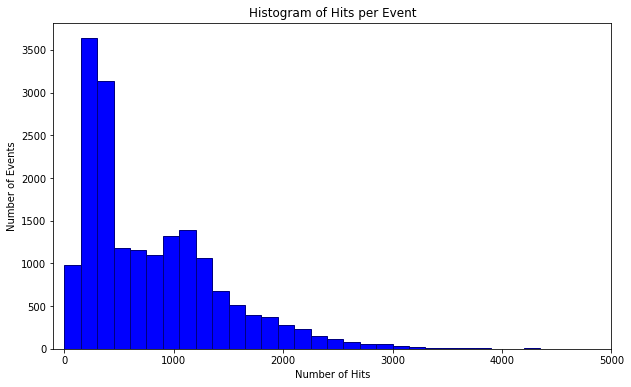

In [21]:
"""plt.figure(figsize=(10, 6))
plt.hist(final_elements, range = [0, 5000], bins=50, color='blue')
plt.xlabel('Number of Hits per Event')
plt.ylabel('Number of Events')
plt.title('Distribution of Hits per Event')"""


bin_hist = 7500/50
histogram = np.zeros(int(7500/bin_hist))  # Initialize histogram with 200 bins
histogram = functions_nHits.count_nHits(np.array(final_elements), bin_hist, histogram)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, 7500, bin_hist), histogram, width = bin_hist, color='blue', align='edge', edgecolor='navy')
plt.xlim(-100, 5000)
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('Histogram of Hits per Event')

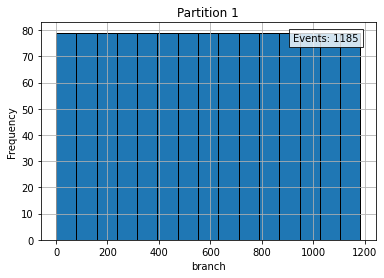

[   0    1    2 ... 1182 1183 1184]


In [26]:
values = tree["event_number"].array(library="np")  # e.g., "eventID"
# Plot a histogram
plt.hist(values, bins=15, edgecolor="black")
plt.xlabel("branch")
plt.ylabel("Frequency")
plt.grid(True)
plt.text(0.95, 0.95, f"Events: {total_events}", 
         horizontalalignment='right', verticalalignment='top',
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.title("Partition 1")
#plt.tight_layout()
plt.show()
#plt.savefig("Plots_histograms/P1/window_time.png", facecolor='white')
print(values)


In [27]:
typenames_dict = tree.typenames()

for branch_name, type_str in typenames_dict.items():
    print(f"{branch_name}: {type_str}")

window_time: double
start_counter: unknown
run_id: int32_t
sub_run_id: int32_t
spill_counter: int32_t
event_number: int32_t
readout_number: int32_t
trigger_types: std::vector<int32_t>
trigger_times: std::vector<double>
led_gains: std::vector<float>
led_dacsettings: std::vector<float>
led_ids: std::vector<int32_t>
led_card_ids: std::vector<int32_t>
led_slot_numbers: std::vector<int32_t>
led_event_types: std::vector<int32_t>
led_types: std::vector<int32_t>
led_sequence_numbers: std::vector<int32_t>
led_counters: std::vector<int32_t>
hit_mpmt_card_ids: std::vector<int32_t>
hit_pmt_channel_ids: std::vector<int32_t>
hit_mpmt_slot_ids: std::vector<int32_t>
hit_pmt_position_ids: std::vector<int32_t>
hit_pmt_charges: std::vector<float>
hit_pmt_times: std::vector<double>
pmt_waveform_mpmt_card_ids: std::vector<int32_t>
pmt_waveform_pmt_channel_ids: std::vector<int32_t>
pmt_waveform_mpmt_slot_ids: std::vector<int32_t>
pmt_waveform_pmt_position_ids: std::vector<int32_t>
pmt_waveform_times: std::v

In [ ]:
times_branch = tree["hit_pmt_calibrated_times"].array(library="np")
event_number_branch = tree["event_number"].array(library="np")

range_hits = 1500
times_array = np.arange(0, 270000+1, range_hits, dtype=int)
nHits = np.zeros((tree.num_entries, len(times_array)))


for times, event_number in zip(times_branch, event_number_branch):

    nHits[event_number, :] = functions_nHits.count_nHits(times, range_hits, nHits[event_number, :])




(1185, 181)


Text(0.5, 0, 'Tiempo (ns)')

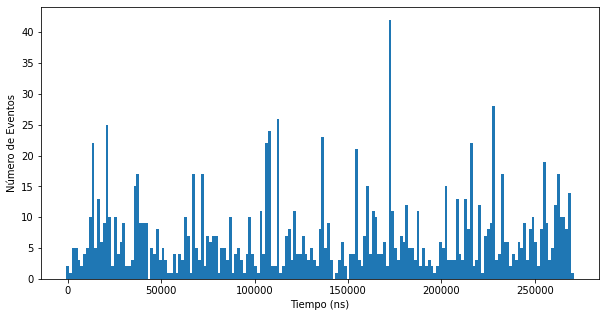

In [29]:
#PARA PLOTEAR CUALQUIER EVENTO
plt.figure(figsize=(10, 5))
plt.bar(times_array, nHits[0,::], width=range_hits)
plt.ylabel('Número de Eventos')
plt.xlabel('Tiempo (ns)')
#plt.savefig("ejemplo_prompt.png")
#plt.show()

In [13]:
# Example array
arr = nHits[435,::]

# Find index of max
max_idx = np.argmax(arr)
max_val = arr[max_idx]

# Define how many neighbors on each side you want
window = 2  # gives you 5 total: [i-2, i-1, i, i+1, i+2]

# Handle edges
start = max(0, max_idx - window)
end = min(len(arr), max_idx + window + 1)

# Extract neighbors
neighbors = arr[start:end]

print(f"Max value: {max_val} at index {max_idx}")
print(f"Neighbors: {neighbors}")


Max value: 380.0 at index 96
Neighbors: [ 23.   4. 380.   8.  26.]


In [32]:

df_nHits = pd.DataFrame(nHits, columns=[str(t) for t in times_array])
df_nHits.insert(0, "event_number", event_number_branch)
df_nHits.to_hdf("/home/cgarcia_2002/nHits_count/dataFrames_nHits/Calibrated/nHits_DataFrame_P0.h5", key="df", mode="w")


[[0. 0. 0. 0. 0. 0. 0.]]
[1 2 6]
0 0
0 1
0 5


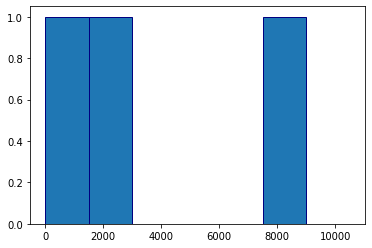

[[1. 1. 0. 0. 0. 1. 0.]] [   0 1500 3000 4500 6000 7500 9000]


In [21]:
#TEST PARA VER COMO QUEDABA
times_branch = np.array([[1000, 3000, 8000]])
event_number_branch = [0]

range_hits = 1500
times_array = np.arange(0, 9000+1, range_hits, dtype=int)
nHits = np.zeros((1, len(times_array)))
print(nHits)

for event, event_number in zip(times_branch, event_number_branch):

    
    div = event//range_hits
    res = event%range_hits


    for i, res_value in enumerate(res):
        if res_value != 0:
            div[i] += 1
    print(div)
    for n in div:
        print(event_number, int(n)-1)
        nHits[event_number, int(n)-1] +=1

plt.figure()
plt.bar(times_array, nHits[0,::], width = 1500, align='edge', edgecolor='navy')
plt.show()
print(nHits, times_array)